In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
articles=pd.read_csv("articles_metadata.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'articles_metadata.csv'

In [5]:
articles.head()

NameError: name 'articles' is not defined

In [5]:
articles['created_at_ts']=pd.to_datetime(articles['created_at_ts'], unit='ms')

In [6]:
articles.head(5)

NameError: name 'articles' is not defined

(array([   50.,   287.,   366.,   307.,   520.,  2145.,   324.,   241.,
          366.,   549.,   844.,  1254.,  2068.,  3347.,  5291.,  7825.,
        11320., 14943., 19182., 22689., 25121., 26852., 27442., 26516.,
        24973., 22527., 20122., 17422., 14958., 12455., 10175.,  8235.,
         6779.,  5463.,  4333.,  3511.,  2717.,  2109.,  1630.,  1338.,
         1041.,   748.,   595.,   459.,   336.,   299.,   248.,   211.,
          160.,   151.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
        264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
        352., 360., 368., 376., 384., 392., 400.]),
 <BarContainer object of 50 artists>)

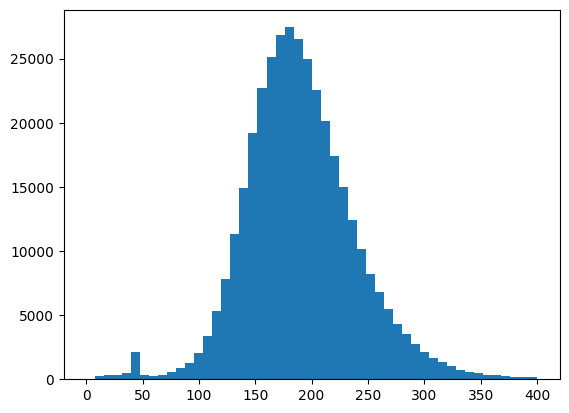

In [7]:
plt.hist(articles['words_count'],bins=50 , range=(0,400))

In [8]:
click_samples=pd.read_csv("clicks_sample.csv")

In [9]:
click_samples.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [10]:
click_samples['session_start']=pd.to_datetime(click_samples['session_start'], unit='ms')

In [11]:
click_samples['click_timestamp']=pd.to_datetime(click_samples['click_timestamp'], unit='ms')


In [12]:
click_samples.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2


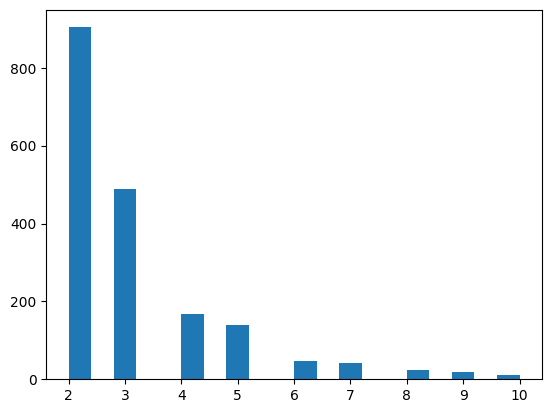

In [13]:
plt.hist(click_samples['session_size'],range=(2,10),bins=20)
plt.title="Click per Session"

In [14]:
click_samples[click_samples['user_id']==0]

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2


In [15]:
click_samples.loc[click_samples.user_id == 67]

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
178,67,1506826394155804,2017-10-01 02:53:14,2,207122,2017-10-01 03:17:53.588,4,1,17,1,16,1
179,67,1506826394155804,2017-10-01 02:53:14,2,110687,2017-10-01 03:18:23.588,4,1,17,1,16,1


In [16]:
# filename will be loop variable and it will iterate through clicks folder and search .csv files and will make path by joining clicks_dir
# with that file name and then pandas will read that file and append in list all_clicks and then we will convert list to .csv file.


if not os.path.exists('clicks.csv'):
     all_clicks=[]
     clicks_dir=r"E:\DataAnalysisProject\archive\clicks\clicks"
     for filename in os.listdir(clicks_dir):
        if filename.endswith(".csv"):
           file_path=os.path.join(clicks_dir, filename)
           df=pd.read_csv(file_path)
           all_clicks.append(df)
     all_clicks_df=pd.concat(all_clicks, ignore_index=True)
     all_clicks_df.to_csv("clicks.csv", index=False)
else:
    all_clicks_df=pd.read_csv('clicks.csv')

In [17]:
all_clicks_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [18]:
df=all_clicks_df.groupby('user_id').agg(article_id=('click_article_id', list))

In [19]:
df


,article_id
user_id,
0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,"[119592, 30970, 30760, 209122]"
3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."
...,...
322892,"[42567, 39894]"
322893,"[50644, 36162]"
322894,"[36162, 168401]"


In [20]:
articles_data=pd.read_csv("articles_metadata.csv")

In [21]:
articles_data.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [22]:
articles_data.loc[articles_data['article_id'] == 68866]

,article_id,category_id,created_at_ts,publisher_id,words_count
68866,68866,136,1506816482000,0,226


In [23]:
articles_to_categories=articles_data['category_id']

In [24]:
all_clicks_df['category_id']=all_clicks_df['click_article_id'].map(articles_to_categories)

In [25]:
all_clicks_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,281
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2,136
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2,375
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2,209
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2,247


In [26]:
all_clicks_df['session_start']=pd.to_datetime(all_clicks_df['session_start'],unit='ms')

all_clicks_df['click_timestamp']=pd.to_datetime(all_clicks_df['click_timestamp'],unit='ms')

all_clicks_df                                      

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,281
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2,136
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2,375
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2,209
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,10051,1508211372158328,2017-10-17 03:36:12,2,84911,2017-10-17 03:39:17.302,4,3,2,1,25,1,174
2988177,322896,1508211376302329,2017-10-17 03:36:16,2,30760,2017-10-17 03:41:12.520,4,1,17,1,25,2,26
2988178,322896,1508211376302329,2017-10-17 03:36:16,2,157507,2017-10-17 03:41:42.520,4,1,17,1,25,2,281
2988179,123718,1508211379189330,2017-10-17 03:36:19,2,234481,2017-10-17 03:38:33.583,4,3,2,1,25,2,375


In [27]:
all_clicks_df

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,281
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2,136
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2,375
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2,209
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,10051,1508211372158328,2017-10-17 03:36:12,2,84911,2017-10-17 03:39:17.302,4,3,2,1,25,1,174
2988177,322896,1508211376302329,2017-10-17 03:36:16,2,30760,2017-10-17 03:41:12.520,4,1,17,1,25,2,26
2988178,322896,1508211376302329,2017-10-17 03:36:16,2,157507,2017-10-17 03:41:42.520,4,1,17,1,25,2,281
2988179,123718,1508211379189330,2017-10-17 03:36:19,2,234481,2017-10-17 03:38:33.583,4,3,2,1,25,2,375


In [28]:
df1=all_clicks_df.groupby('user_id').agg(articles_id=('click_article_id',list),categories_id=('category_id',list)).reset_index()

In [29]:
df1


,user_id,articles_id,categories_id
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,...","[281, 136, 209, 431, 281, 375, 186, 186]"
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,...","[375, 209, 123, 281, 412, 281, 331, 412, 435, ..."
2,2,"[119592, 30970, 30760, 209122]","[247, 26, 26, 332]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513...","[375, 375, 375, 375, 375, 375, 281, 375, 375, ..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ...","[92, 81, 317, 317, 132, 437, 399]"
...,...,...,...
322892,322892,"[42567, 39894]","[67, 66]"
322893,322893,"[50644, 36162]","[99, 43]"
322894,322894,"[36162, 168401]","[43, 297]"
322895,322895,"[289197, 63746]","[418, 133]"


In [30]:
def user_category_ids(user_id):
     user_df=all_clicks_df[all_clicks_df['user_id']==user_id]


     result=(user_df.groupby('category_id').agg(num_clicks=('category_id','count'))
           
            .sort_values('num_clicks', ascending=False)
            .reset_index())
     result['click_norms']=result['num_clicks']/result['num_clicks'].max()
     return result
        

In [31]:
user_category_ids(45)

,category_id,num_clicks,click_norms
0,281,11,1.000000
1,331,3,0.272727
2,412,2,0.181818
3,136,1,0.090909
4,317,1,0.090909
5,228,1,0.090909
6,340,1,0.090909
7,448,1,0.090909


In [32]:
def recommendation(user_id,all_clicks,articles_data):
    user_pref=user_category_ids(user_id)
    merged=articles_data.merge(user_pref,on='category_id',how='right')
    recommendations=merged[['article_id','category_id','num_clicks','click_norms']]
    recommended_articles=recommendations[recommendations['click_norms']>0.5]#more than 50 percent
    return recommended_articles[['category_id','article_id']]

In [37]:
recommendation(58,all_clicks_df,articles_data)

,category_id,article_id
0,375,227879
1,375,227880
2,375,227881
3,375,227882
4,375,227883
...,...,...
10000,375,237879
10001,375,237880
10002,375,237881
10003,375,237882


In [278]:
articles_data['created_at_ts']=pd.to_datetime(articles_data['created_at_ts'],unit='ms')

In [279]:
articles_data.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13 05:53:39,0,168
1,1,1,2014-07-14 12:45:36,0,189
2,2,1,2014-08-22 00:35:06,0,250
3,3,1,2014-08-19 17:11:53,0,230
4,4,1,2014-08-03 13:06:11,0,162


In [280]:
#Most click region wise
# selectiong top 100 regions with most article clixcks
region_wise_clicks=all_clicks_df[['click_article_id','click_region']]
click_region_df=region_wise_clicks.groupby('click_region').agg(articles_ids_clicked=('click_article_id','count')
) .sort_values('articles_ids_clicked',ascending=False)
               

top100_click_region_sorted=click_region_sorted.head(20).reset_index()
top100_click_region_sorted

,click_region,articles_ids_clicked
0,25,804985
1,21,464230
2,13,320957
3,8,179339
4,16,164884
5,28,135793
6,24,130537
7,20,120884
8,5,96979
9,9,84693


In [281]:
#Which user segments (country, device, OS, environment) generate the highest average session size and engagement?













In [282]:
#code to extrract hours,minute,sec,day,month,year from time type data
all_clicks_df['click_timestamp']=pd.to_datetime(all_clicks_df['click_timestamp'],unit='ms')

all_clicks_df                                      

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,281
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2,136
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2,375
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2,209
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,10051,1508211372158328,2017-10-17 03:36:12,2,84911,2017-10-17 03:39:17.302,4,3,2,1,25,1,174
2988177,322896,1508211376302329,2017-10-17 03:36:16,2,30760,2017-10-17 03:41:12.520,4,1,17,1,25,2,26
2988178,322896,1508211376302329,2017-10-17 03:36:16,2,157507,2017-10-17 03:41:42.520,4,1,17,1,25,2,281
2988179,123718,1508211379189330,2017-10-17 03:36:19,2,234481,2017-10-17 03:38:33.583,4,3,2,1,25,2,375


In [285]:
all_clicks_df['session_id']

0          1506825423271737
1          1506825423271737
2          1506825426267738
3          1506825426267738
4          1506825435299739
                 ...       
2988176    1508211372158328
2988177    1508211376302329
2988178    1508211376302329
2988179    1508211379189330
2988180    1508211379189330
Name: session_id, Length: 2988181, dtype: int64

In [295]:
import pandas as pd

# Example: your DataFrame is called all_clicks_df
# Columns: user_id, session_id, click_article_id, ...

# 1. Count unique articles per user per session
articles_per_session=all_clicks_df.groupby(['user_id', 'session_id'])['click_article_id'].nunique().reset_index(name='articles_read')

articles_per_session
# # 2. Calculate the average articles read per session



,user_id,session_id,articles_read
0,0,1506825423271737,2
1,0,1507340000920377,2
2,0,1507385847186982,2
3,0,1507514030209212,2
4,1,1506825426267738,2
...,...,...,...
1048589,322892,1508211224254301,2
1048590,322893,1508211291270312,2
1048591,322894,1508211292336313,2
1048592,322895,1508211314125317,2
